Student performance Indicator

Life cycle of Machine Learning Project

1)Understand the problem statement
2)Data collection
3)Data checks to perform
4)Exploratory data analysis
5)Data pre-processing
6)Model Training
7)Choose best model

1) Problem Statement

This project understands how students performance (test scores) is affected by other variables such as Gender,Ethnicity,Parental Level of education,Lunch and Test preparation course.

2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

2.1 Import Data and required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("stud.csv")

In [3]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.shape

(1000, 8)

2.2 Dataset information

1) gender : sex of students -> (Male/female)
2) race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3) parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4) lunch : having lunch before test (standard or free/reduced)
5) test preparation course : complete or not complete before test
6) math score
7) reading score
8) writing score

3) Data Check to perform

check Missing Values,
check Duplicates,
check data type,
check the number of unique value of each columns,
check statistic of data set,
check various categories present in the different categorical column

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights

from the above description of numerical data, all means are very close to each other (Between 66 and 68.05)

All the standard deviation are also close - between 14.6 and 15.19;

While there is minimum score of 0 for math, 17 for reading and 10 for writing. But maximum socre of 100 for each subjects.

Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
numeric_features=[features for features in df.columns if df[features].dtype != 'O']
numeric_features

['math_score', 'reading_score', 'writing_score']

In [13]:
categorical_variable=[features for features in df.columns if df[features].dtype=='O']
categorical_variable

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [14]:
for col in categorical_variable:
    cat=df[col].unique()
    print(f"Categories in {col} has {len(cat)} unique variable = {cat}")

Categories in gender has 2 unique variable = ['female' 'male']
Categories in race_ethnicity has 5 unique variable = ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education has 6 unique variable = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch has 2 unique variable = ['standard' 'free/reduced']
Categories in test_preparation_course has 2 unique variable = ['none' 'completed']


Adding Total_score and Average:

In [15]:
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']

In [16]:
df["Average"]=round(df['Total_score']/3,2)

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [18]:
for col in numeric_features:
    x= df[df[col]==100][col].count()
    print(f"Number of students with full mark in {col} = {x}")

Number of students with full mark in math_score = 7
Number of students with full mark in reading_score = 17
Number of students with full mark in writing_score = 14


In [19]:
for col in numeric_features:
    y=df[df[col]<=20][col].count()
    print(f"Number of studnets with less than 20 marks in {col} = {y}")

Number of studnets with less than 20 marks in math_score = 4
Number of studnets with less than 20 marks in reading_score = 1
Number of studnets with less than 20 marks in writing_score = 3


Exploring Data (Visualization)

Visualize average score distribution to make some conclusion

Histogram

Kernal Density Function (KDE)

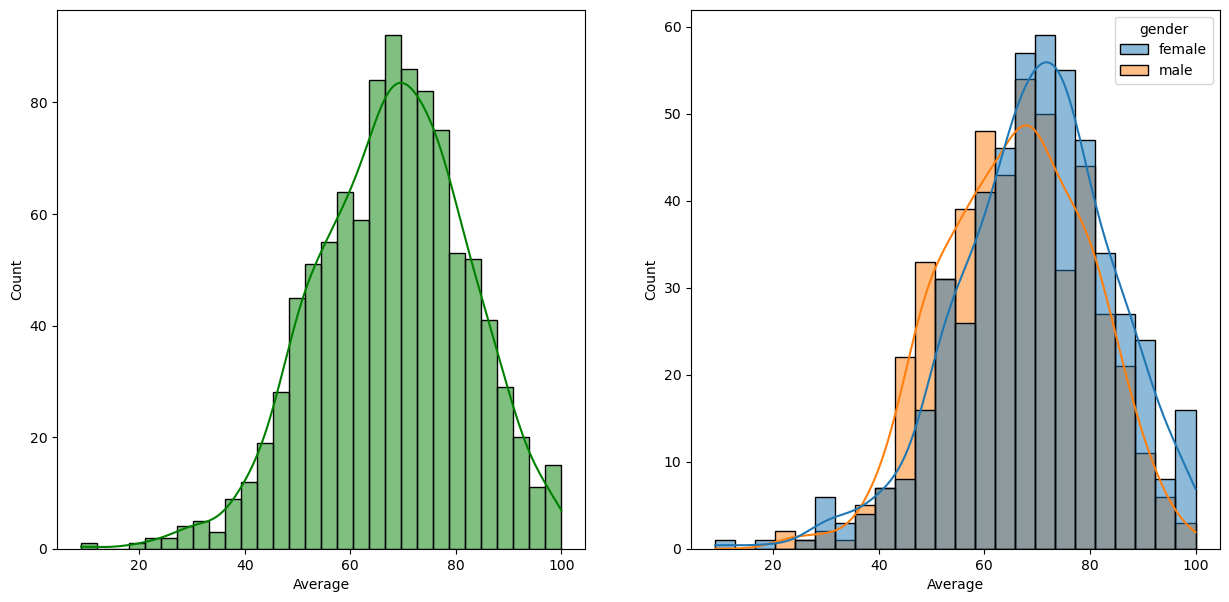

In [22]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',hue='gender',kde=True)
plt.show()

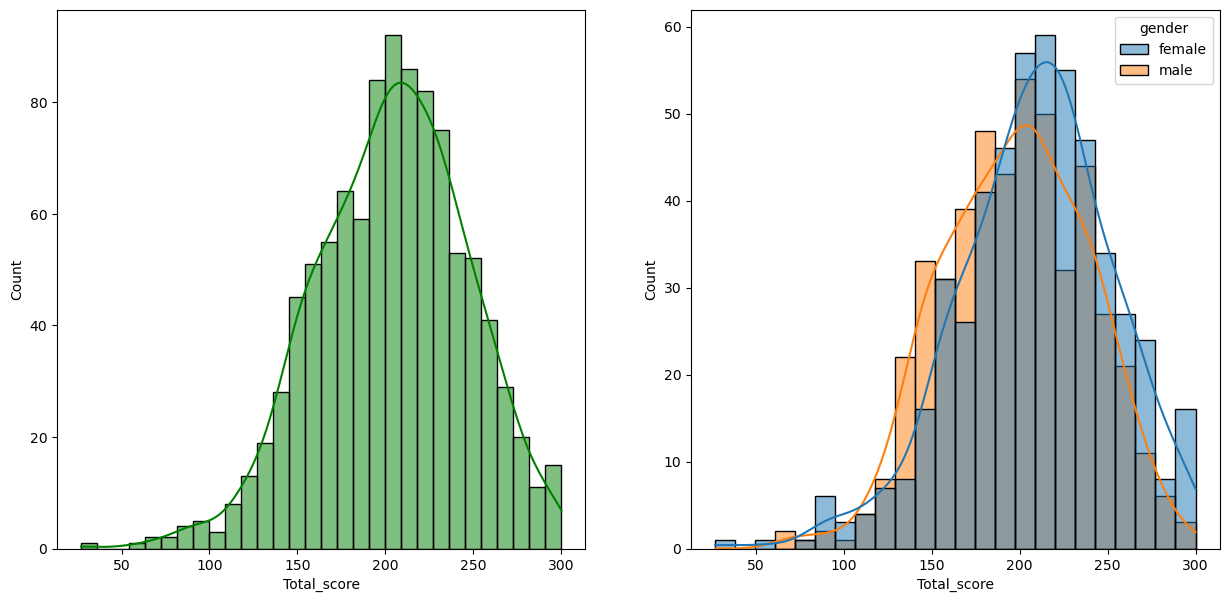

In [24]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',kde=True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x="Total_score",kde=True,hue='gender')
plt.show()

Insights

Female students perform well then Male students

In [25]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'Average'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

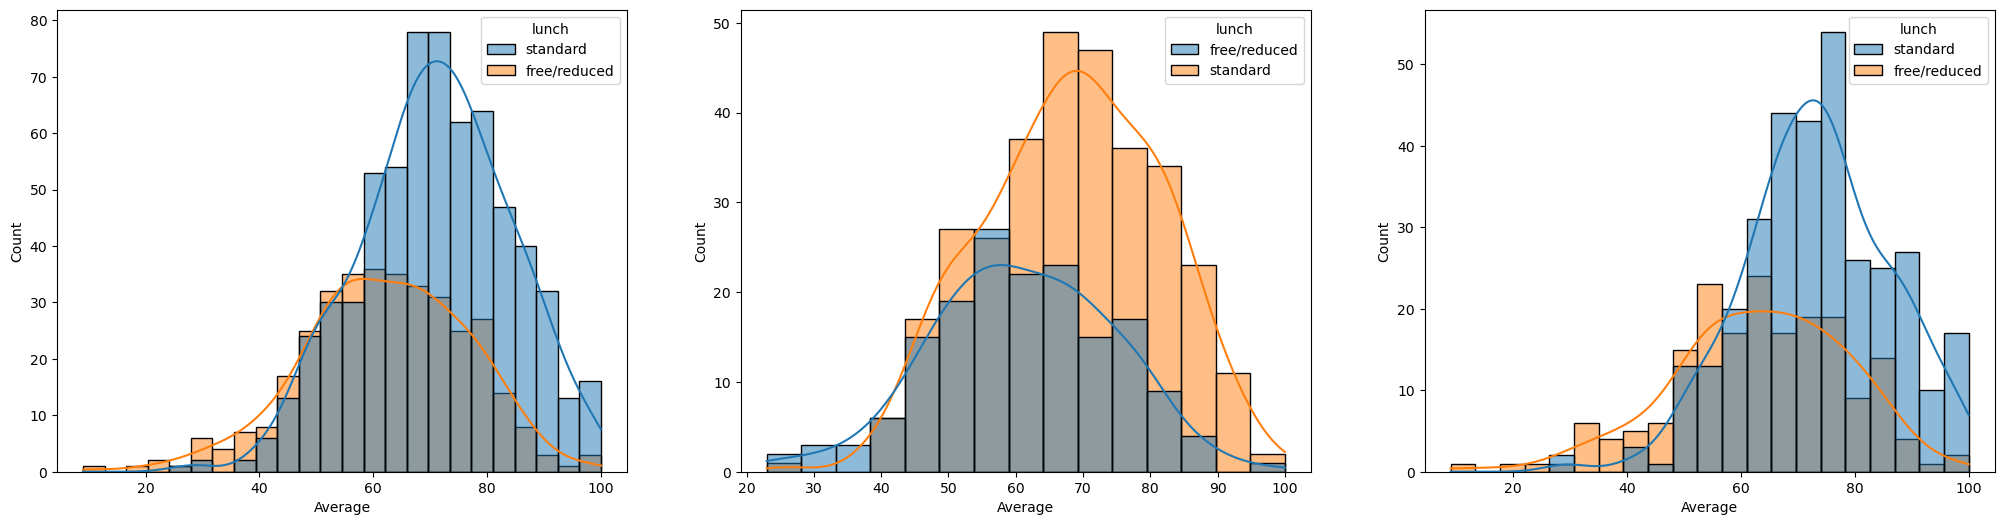

In [30]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.show

Insights:

Standard lunch helps perform well in exam regardless of gender.

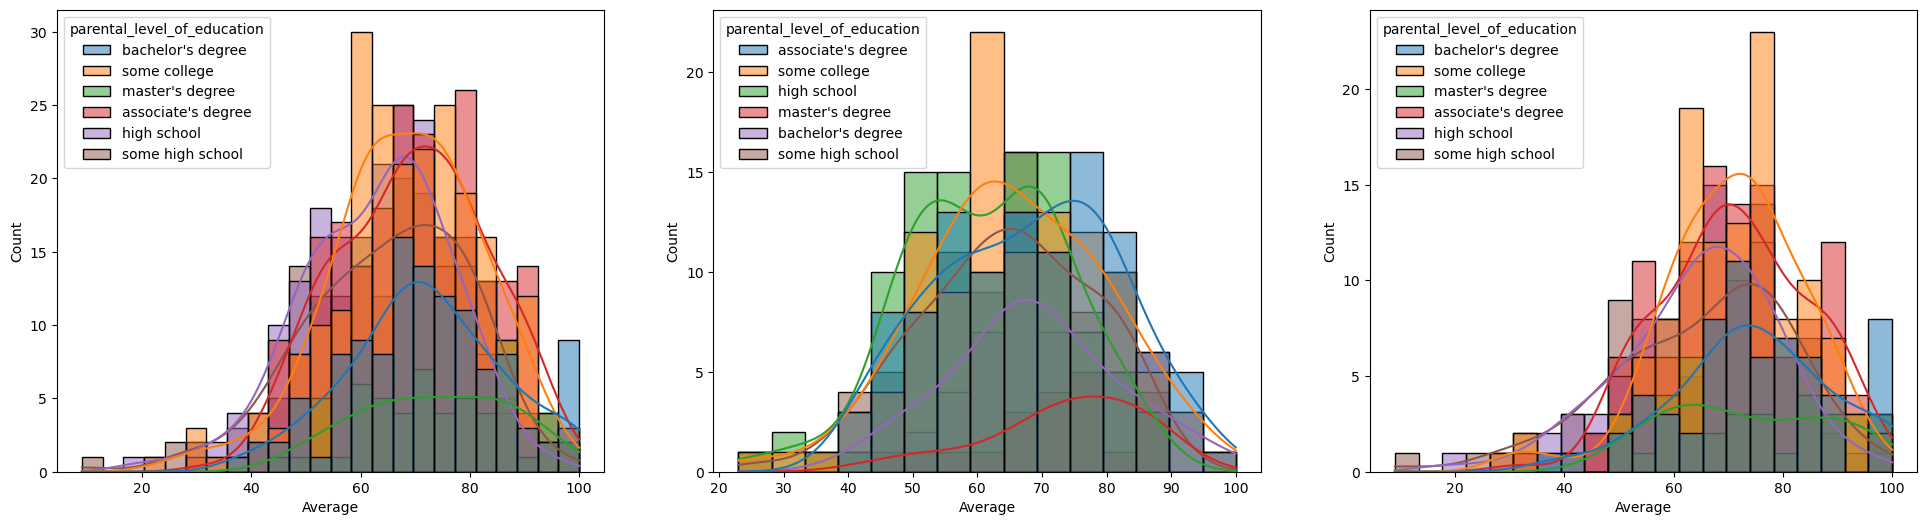

In [31]:
fig,axs=plt.subplots(1,3,figsize=(24,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

Insights:

In general parent's education doesn't help student perform well in exam